<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;border:20px;color:Black'>Car Insurance Cold Calls<h2>

![](https://media2.giphy.com/media/NsGAPK1LajNt2urNgA/giphy.gif)

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;border:20px;color:Black'>Table of Contents<h2>
    
1. Introduction
2. Data Id
3. Librraries
4. Data analysis and preprocessing
5. ML models
6. Results for Test set
    
# Introduction
## description

This is a dataset from one bank in the United States. Besides usual services, this bank also provides car
insurance services. The bank organizes regular campaigns to attract new clients. The bank has potential
customers’ data, and bank’s employees call them for advertising available car insurance options. We are
provided with general information about clients (age, job, etc.) as well as more specific information about the
current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like
previous attempts, outcome). 
    
## Aim of the notebook:
The task is to predict for 1000 customers who were contacted during the current campaign, whether they will
buy car insurance or not.

![](https://media0.giphy.com/media/l2JdXdTUsNAOZLo8o/giphy.gif)

# Data Id

This dataset is named [Car Insurance Cold Calls](https://www.kaggle.com/kondla/carinsurance). The dataset contains two sets data:
1. **training set** - 4,000 records under 19 attributes.

2. **testing set** - 1,000 records under 19 attributes.
    
## Attributes:

![](https://miro.medium.com/max/962/1*qPepoH3_CzypeZ-K-z0VaQ.png)

# Libraries 📚

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate

#cross validation
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', None)

#warning handle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data analysis and preprocessing 💻
## File Paths 📂

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#paths for the dataset
tr_path = "/kaggle/input/carinsurance/carInsurance_train.csv" 
te_path = "/kaggle/input/carinsurance/carInsurance_test.csv" 

## First look at the data:

In [ ]:
tr_df = pd.read_csv(tr_path, index_col = 'Id')
te_df = pd.read_csv(te_path, index_col = 'Id')
tr_df.head()

In [ ]:
te_df.head()

In [ ]:
tr_df.info()

In [ ]:
te_df.info()

In [ ]:
print("Training Shape (row, col): {}, Testing Shape (row, col): {}".format(tr_df.shape, te_df.shape))

In [ ]:
tr_df.describe()

In [ ]:
te_df.describe()

In [ ]:
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()
for col in cat[:6]:
    print("train\n")
    print(col,"\n",tr_df[col].value_counts()/tr_df.shape[0],"\n\n")
    print("test\n")
    print(col,"\n",te_df[col].value_counts()/te_df.shape[0],"\n\n")

In [ ]:
for call in cat[6:8]:
    tr_df[call] = pd.to_datetime(tr_df[call])
tr_df.info()

In [ ]:
tr_df["call_time"] = tr_df["CallEnd"]  - tr_df["CallStart"]
# extracting time from timestamp
tr_df["call_time"] = tr_df["call_time"].dt.components["minutes"]*60 + tr_df["call_time"].dt.components["seconds"]
#tr_df["Car_Insurance"] = tr_df["CarInsurance"].copy()
#tr_df = tr_df.drop(["CarInsurance"], axis = 1)
tr_df.head()

In [ ]:
#tr_df["CallEnd"] = tr_df["CallEnd"].dt.time
#tr_df["CallStart"] = tr_df["CallStart"].dt.time
#tr_df["call_time"] = tr_df["call_time"].astype("")

In [ ]:
tr_df.info()

In [ ]:
for call in cat[6:8]:
    te_df[call] = pd.to_datetime(te_df[call])
te_df["call_time"] = te_df["CallEnd"]  - te_df["CallStart"]
# extracting time from timestamp
te_df["call_time"] = te_df["call_time"].dt.components["minutes"]*60 + te_df["call_time"].dt.components["seconds"]
#te_df["Car_Insurance"] = te_df["CarInsurance"].copy()
#te_df = te_df.drop(["CarInsurance"], axis = 1)
#te_df["CallEnd"] = te_df["CallEnd"].dt.time
#te_df["CallStart"] = te_df["CallStart"].dt.time
te_df.info()

In [ ]:
print(tr_df.call_time.describe())
print(te_df.call_time.describe())

## Missing values ⭕

The filling missing values strategy here:
1. Filling the mode value in `Job`,`Education`, `Communication` attributes.
2. Filling the value `no prevoius contact` in our `Outcome` attribute.

In [ ]:
null_cols = ["Job","Education", "Communication", "Outcome"]
for col in null_cols[:3]:
    tr_df[col] = tr_df[col].fillna(
    tr_df[col].dropna().mode().values[0])    
    print(f"{col}:\n{tr_df[col].value_counts()}\n","-"*50)


In [ ]:
for col in null_cols[:3]:
    te_df[col] = te_df[col].fillna(
    te_df[col].dropna().mode().values[0])
    
tr_df["Outcome"] = tr_df["Outcome"].fillna("no prevoius contact")
#te_df = te_df.drop(["Outcome"],axis = 1)
te_df["Outcome"] = te_df["Outcome"].fillna("no prevoius contact")

In [ ]:
print(tr_df.info())
print(te_df.info())

<h2 style='text-align:left;font-family:Comic Sans MS;font-size:20px;border:20px;color:Black'>Now our data is all filled and ready for visualization! 🖥📈<h2>

![](https://i.pinimg.com/originals/c9/91/72/c99172c17b83d3c620b997858351b2a5.gif)

## Data visalization 📊
### Unvariate plots
Visualizing our data for further understanding of how the data is spreaded

In [ ]:
print(tr_df["CarInsurance"].value_counts())
#tr_df[cat[-1]].hist(grid = False)

#print(i)
total = float(len(tr_df["CarInsurance"]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(tr_df["CarInsurance"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

This suggests if any part of the data is not spreaded at a 6:4 ratio divided by the target `CarInsurance`, It may show a connection of how the target reacts.

In [ ]:
num_cols =  tr_df.select_dtypes('number').columns.to_list()
cat_cols =  tr_df.select_dtypes('object').columns.to_list() 

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(x="Outcome" , data=tr_df ,palette='rocket_r')
plt.title("Outcome", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Outcome"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(x="Job" , data=tr_df ,palette='viridis_r')
plt.title("Job", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Job"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Marital" , data=tr_df ,palette='rocket')
plt.title("Marital", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Marital"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Education" , data=tr_df ,palette='nipy_spectral')
plt.title("Education", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Education"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Default" , data=tr_df ,palette='CMRmap')
plt.title("Default", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Default"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="HHInsurance" , data=tr_df ,palette='rainbow')
plt.title("HHInsurance", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["HHInsurance"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="CarLoan" , data=tr_df ,palette='rocket')
plt.title("CarLoan", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["CarLoan"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Communication" , data=tr_df ,palette='cubehelix')
plt.title("Communication", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Communication"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="LastContactDay" , data=tr_df ,palette='icefire')
plt.title("LastContactDay", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["LastContactDay"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="LastContactMonth" , data=tr_df ,palette='rainbow')
plt.title("LastContactMonth", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["LastContactMonth"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="NoOfContacts" , data=tr_df ,palette='nipy_spectral')
plt.title("NoOfContacts", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["NoOfContacts"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="PrevAttempts" , data=tr_df ,palette='coolwarm')
plt.title("PrevAttempts", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["PrevAttempts"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="Outcome" , data=tr_df ,palette='viridis')
plt.title("Outcome", fontsize=14)
plt.show()
print("% of total:")
print(round((tr_df["Outcome"].value_counts()/tr_df.shape[0]),4)*100)

In [ ]:
tr_df["Balance"].describe()

In [ ]:
tr_df["DaysPassed"].describe()

### correlation plots

In [ ]:
#plotting the correlation matrix
sns.heatmap(tr_df.corr() ,cmap='rocket')

In [ ]:
#correlation table
corr = tr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

We can see a slight positive correlation between `CarInsurance` and `call_time` meaning a longer call might increase the odds of subcribing an insurance.

## feature engineering

we want to create more features for further analysis and grouping of attributes.


### age group

our groups will be created using the following method:
        
        `pd.cut(df, bins, labels, right=False)`
        
* **young adult** - 18-29
* **young adult** - 30-39
* **middle aged** - 40-49
* **veteran** - 50-59
* **senior citizen** - 60+



In [ ]:
bins= [18,30,40,50,60,100]
labels = ['young adult','adult','middle aged','veteran','senior citizen']
tr_df["Age_Group"] = pd.cut(tr_df['Age'], bins=bins, labels=labels, right=False)

### call season

Winter, Spring, Summer and Fall classification.

In [ ]:
seasons = {'dec':0, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11}
tr_df = tr_df.applymap(lambda lable: seasons.get(lable) if lable in seasons else lable)
bins= [0,3,6,9,12]
labels = ['winter','spring','summer','fall']
tr_df["LC_Seasons"] = pd.cut(tr_df['LastContactMonth'], bins=bins, labels=labels, right=False)
tr_df["LC_Seasons"].head()

### call month period


Dividing our data to begining middle and end of the month.

In [ ]:
bins= [0,10,20,32]
labels = ['begining','middle','end']
tr_df["LC_Month_Period"] = pd.cut(tr_df['LastContactDay'], bins=bins, labels=labels, right=False)
tr_df["LC_Month_Period"].head()

### call time of day

We want to check the time span of the calls.



In [ ]:
print(tr_df["CallStart"].dt.time.max())
print(tr_df["CallStart"].dt.time.min())

the calls are within daily shifts of 9:00 AM until 18:00 PM
so we will divide the shifts into 3 categories:
* morning 9:00-12:00
* noon 12:00-15:00
* afternoon 15:00-18:00

In [ ]:
tr_df["Time_Of_Day"]=pd.cut(tr_df["CallEnd"].dt.hour,
               [9,12,15,28],
               labels=['Morning','noon','Afternoon'],
               include_lowest=True)
tr_df.head()

### Days Passed Lenth

How long has it been since last contact:

* **no prevoius contact**
* **a day - six months**
* **over six months**

In [ ]:
tr_df["DaysPassedLenth"]=pd.cut(tr_df["DaysPassed"],
               bins = [-1,0,182,1095],
               labels= ["no prevoius contact",'a day - six months','over six months'], include_lowest=True)
tr_df["DaysPassedLenth"].head()

### Balance status

Is the Yearly Balance negitive, low, medium or high.

In [ ]:
tr_df["Balance_status"]=pd.cut(tr_df["Balance"],
               bins = [-4000,0,1000,5000, 100000],
               labels= ["negitive balance",'low','mid', 'high'], include_lowest=True)
tr_df["Balance_status"].head()

In [ ]:
tr_df.info()

Plotting the new attributes:

In [ ]:
cols = tr_df.columns.to_list() 
for col in cols[19:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=tr_df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((tr_df[col].value_counts()/tr_df.shape[0]),4)*100)

### multivariate plots

How the data behaves and splits by our target data `CarInsurance`.

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Job" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Job", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["Job","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Marital" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Marital", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["Marital","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Education" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Education", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["Education","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Default" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Default", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["Default","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="HHInsurance" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("HHInsurance", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["HHInsurance","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="CarLoan" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("CarLoan", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["CarLoan","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Communication" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Communication", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["Communication","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="NoOfContacts" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("NoOfContacts", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Outcome" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Outcome", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
pd.pivot_table(tr_df, index=["Outcome","CarInsurance"], aggfunc = {col:np.count_nonzero})

In [ ]:
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="PrevAttempts" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("PrevAttempts", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

### engineered features plot

In [ ]:
for col in cols[19:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

In [ ]:
tr_df["call_time"] = pd.cut(tr_df["call_time"], bins=[0, 180, 900,3600], labels=["short", "medium", "long"], right=False)
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
sns.countplot(x="call_time" ,hue='CarInsurance', data=tr_df ,palette='coolwarm_r')
plt.xlabel("call_time", fontsize=20)
plt.legend(("0: insurance not subscibed", "1: insurance subscibed"),loc='upper left')

<h2 style='text-align:left;font-family:Comic Sans MS;font-size:30px;border:20px;color:Black'>📝Note:<h2>
    <h2 style='text-align:left;font-family:Comic Sans MS;font-size:20px;border:20px;color:Black'>We need to insert the engineered features into the testing set! let's update it:<h2>
        
### Our Chosen Features will be stored in the variable `reorder_columns`

In [ ]:
#te_df update 

#age group
te_df["Age_Group"] = pd.cut(te_df['Age'], bins=[18,30,40,50,60,100], labels=['young adult','adult','middle aged','veteran','senior citizen'], right=False)

#seasons

#seasons = {'dec':0, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11}
te_df = te_df.applymap(lambda lable: seasons.get(lable) if lable in seasons else lable)
te_df["LC_Seasons"] = pd.cut(te_df['LastContactMonth'], bins=[0,3,6,9,12], labels=['winter','spring','summer','fall'], right=False)

#LC_Month_Period 
te_df["LC_Month_Period"] = pd.cut(te_df['LastContactDay'], bins=[0,10,20,32], labels=['begining','middle','end'], right=False)

#Time_Of_Day"
te_df["Time_Of_Day"]=pd.cut(te_df["CallEnd"].dt.hour,
               bins=[9,12,15,28],
               labels=['Morning','noon','Afternoon'],
               include_lowest=True)
#DaysPassedLenth
te_df["DaysPassedLenth"]=pd.cut(te_df["DaysPassed"],
               bins = [-1,0,182,1095],
               labels= ["no prevoius contact",'a day - six months','over six months'], include_lowest=True)

#Balance_status
te_df["Balance_status"]=pd.cut(te_df["Balance"],
               bins = [-4000,0,1000,5000, 100000],
               labels= ["negitive balance",'low','mid', 'high'], include_lowest=True)

#call_time
te_df["call_time"] = pd.cut(te_df["call_time"], bins=[0, 180, 900,3600], labels=["short", "medium", "long"], right=False)


reorder_columns = ['Job','HHInsurance','CarLoan','PrevAttempts','Outcome','call_time',
                    'Age_Group', 'LC_Seasons', 'LC_Month_Period', 'Time_Of_Day','DaysPassedLenth','Balance_status','CarInsurance']
tr_df = tr_df[reorder_columns]
te_df = te_df[reorder_columns]
print(tr_df.info())
print(te_df.info())

## feature encoding

**one hot**:
* `Job`
* `Outcome`


**Label**:

* `Lc_seasons`
* `call_time`
* `Age_Group`
* `LC_Month_Period`
* `Time_Of_Day`
* `DaysPassedLenth`
* `Balance_status`

<h2 style='text-align:left;font-family:Comic Sans MS;font-size:30px;border:20px;color:Black'>📝Note:<h2>
    <h2 style='text-align:left;font-family:Comic Sans MS;font-size:20px;border:20px;color:Black'>One Hot is better for ordinal attributes, Label is for nominal attributes.<h2>

In [ ]:
#lable encoding

le = LabelEncoder()
Label = ['call_time','Age_Group', 'LC_Seasons', 'LC_Month_Period','Time_Of_Day','DaysPassedLenth','Balance_status']
                     

for i in Label:
    tr_df[i] = le.fit_transform(tr_df[i])
    te_df[i] = le.fit_transform(te_df[i])
    
#one hot encoding
cols = ['Job', 'Outcome']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(te_df[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = tr_df.index
te_oh.index = te_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([tr_df, tr_oh], axis=1)
te_fe = pd.concat([te_df, te_oh], axis=1)

tr_fe = tr_fe.drop(cols, axis = 1)
te_fe = te_fe.drop(cols, axis = 1)

print(tr_fe.info())
print(te_fe.info())

# Machine learning models
![](https://intellipaat.com/blog/wp-content/uploads/2017/01/What-is-machine-learning.gif)

In the Next seciton we will make `X` as the features and `y` as `CarInsurance` - the target value we want to predict.

**Assumptions:**

* This is a classification problem so we will use classification methods.

* Train test split will be a 75:25 ratio respectively.

* a 5-fold cross validation is initiated the final value of each metric is the mean score.

## Models we will use:

* **Logistic Regression** 
* **Random Forest Regressor** 
* **XGBoost Classifier**
 

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting `CarInsurace`

4. Classification metrics

### Score Metrics for Classification:

* **Accuracy** - Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem.
    
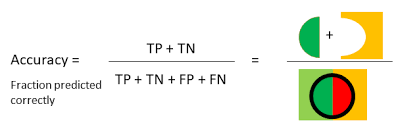

**key**:

    TP - True Positive
    TN - True Negitive
    TP - True Positive
    TN - True Negitive
    
* **Precision** - Answers the following question: what proportion of **predicted Positives** is truly Positive?

    Precision = (TP)/(TP+FP)
    
* **Recall** - Answers the following question: what proportion of **actual Positives** is correctly classified?

    Recall = (TP)/(TP+FN)

* **f1 score** - A number between 0 and 1, the harmonic mean of precision and recall.

![](https://miro.medium.com/max/564/0*-lZUM_HsT3RsgePy.png)

In [ ]:
y = tr_fe['CarInsurance']
X = tr_fe.drop('CarInsurance', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

In [ ]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

## XGBoost

In [ ]:
#model
XGB = XGBClassifier()
#cross validation
XGB_report = pd.DataFrame(cross_validate(XGB, X, y, scoring=scoring))
#getting required score methods
XGB_report = XGB_report.iloc[:,2:]
#naming the columns
XGB_report.columns = scoring
#naming the index
XGB_report.index = index

#final result collection
model_1 = []

#Classification report
print("Clasification report:\n")
print(XGB_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(XGB_report[score].mean(),4)}")
    model_1.append(round(XGB_report[score].mean(),4))

## Logistic Regression

In [ ]:
#model
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

#final result collection
model_2 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_2.append(round(LR_report[score].mean(),4))

## Random Forest

In [ ]:
#model
RF = RandomForestClassifier()
#cross validation
RF_report = pd.DataFrame(cross_validate(RF, X, y, scoring=scoring))
#getting required score methods
RF_report = RF_report.iloc[:,2:]
#naming the columns
RF_report.columns = scoring
#naming the index
RF_report.index = index

#final result collection
model_3 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_3.append(round(RF_report[score].mean(),4))

# Metrics results table

In [ ]:
Models = pd.DataFrame({
    'XGBoost': np.array(model_1),
    'Logistic Regression': np.array(model_2),
    'Random Forest': np.array(model_3)})
Models.index = scoring
Models

# Results for Test set

For this problem the main metric to look at is recall which identifies the percetage of correct positives out of all positives.
Logistic Regression has performed best (identified **66.52%** isnurance subscibers out of all subscibers in average of all tests)
therefor we can assume the model can predict two thirds of the actual calls that ended with subscribed insurance. The prediction is stored in a csv file.

In [ ]:
LR.fit(X,y)
X_test = te_fe.drop("CarInsurance", axis = 1)
te_fe["CarInsurance"] = LR.predict(X_test)
te_fe["CarInsurance"] = te_fe["CarInsurance"].apply(lambda x: "wiil not buy insurance" if x==0 else "wiil buy insurance")
columns = ['HHInsurance', 'CarLoan', 'PrevAttempts', 'call_time', 'Age_Group',
       'LC_Seasons', 'LC_Month_Period', 'Time_Of_Day', 'DaysPassedLenth',
       'Balance_status', 'Job_admin.', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Outcome_failure', 'Outcome_no prevoius contact',
       'Outcome_other', 'Outcome_success', 'CarInsurance']
te_fe = te_fe[columns]
te_fe["CarInsurance"].value_counts()

In [ ]:
te_fe.to_csv("Insurance Purchase Forcast.csv")

![](https://thumbs.gfycat.com/CluelessVioletAgouti.webp)

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:60px;border:20px;color:Black'>Thank you!<h2>